In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import holidays
from __future__ import division, print_function, unicode_literals
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, cohen_kappa_score, classification_report
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors, datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from scipy.stats import probplot
from scipy import stats
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Users\\ValVal\\Desktop\\Intro to BA\\Group Project\\hotel_booking.csv") # change the path to your local path
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


# Explore Data

In [3]:
num_rows, num_cols = df.shape
print(f"The DataFrame has {num_rows} rows and {num_cols} columns.")

The DataFrame has 119390 rows and 36 columns.


In [4]:
# Explore initial data set
def explore_data(dataframe):
    print("First few rows of the dataset:")
    print(dataframe.head())

    print("\nData Types of Each Column:")
    print(dataframe.dtypes)

    print("\nStatistics of the Numerical Columns:")
    print(dataframe.describe().round(2))

    print("\nMissing Values in Each Column:")
    print(dataframe.isnull().sum())

explore_data(df)

First few rows of the dataset:
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  customer_type  \
0                        0                     0     

In [5]:
# Check the distinct values of categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f'\nColumn: {column}')
    print(df[column].value_counts())


Column: hotel
hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

Column: arrival_date_month
arrival_date_month
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: count, dtype: int64

Column: meal
meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

Column: country
country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: count, Length: 177, dtype: int64

Column: market_segment
market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

Column: dis

# Data Preparation

In [6]:
df = df[df['hotel'] == 'City Hotel']
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,Transient,0.00,0,0,Check-Out,2015-07-03,Elizabeth Ross,Ross.Elizabeth@att.com,313-076-6204,************4378
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,Transient,76.50,0,1,Canceled,2015-07-01,Adam Aguilar,AAguilar@comcast.net,796-281-4143,************2797
40062,City Hotel,1,65,2015,July,27,1,0,4,1,...,Transient,68.00,0,1,Canceled,2015-04-30,Mark Keller,Mark_Keller@hotmail.com,227-821-0234,************9384
40063,City Hotel,1,92,2015,July,27,1,2,4,2,...,Transient,76.50,0,2,Canceled,2015-06-23,Sarah Scott,SScott88@aol.com,443-817-6604,************7979
40064,City Hotel,1,100,2015,July,27,2,0,2,2,...,Transient,76.50,0,1,Canceled,2015-04-02,Misty Perry,Misty.P68@att.com,801-946-4619,************4844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


## Drop Irrelevant Data
Data of individual customer (e.g. name, email) or third-party company (e.g. company, agent) is not relevant.

In [7]:
df.drop(['name', 'email', 'phone-number', 'country', 'credit_card', 'company', 'agent'], axis=1, inplace=True)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,A,0,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-03
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,A,0,No Deposit,0,Transient,76.50,0,1,Canceled,2015-07-01
40062,City Hotel,1,65,2015,July,27,1,0,4,1,...,A,0,No Deposit,0,Transient,68.00,0,1,Canceled,2015-04-30
40063,City Hotel,1,92,2015,July,27,1,2,4,2,...,A,0,No Deposit,0,Transient,76.50,0,2,Canceled,2015-06-23
40064,City Hotel,1,100,2015,July,27,2,0,2,2,...,A,0,No Deposit,0,Transient,76.50,0,1,Canceled,2015-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Drop Columns That Might Lead to Data Leakage
Remove any post-booking data.

In [8]:
# 'days_in_waiting_list' may include information about whether a booking was ultimately canceled or not while it was on the waiting list
# 'reservation_status' contains post-booking information such as 'Check-Out'
# 'reservation_status_date' is the date 'reservation_status' last updated. For the same reason above, it's leaky.
# 'booking_changes' may contain information about cancellation or motives to cancel, maybe it was cancelled before and then rebooked
df.drop(['days_in_waiting_list', 'reservation_status', 'reservation_status_date', 'booking_changes'], axis=1, inplace=True)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,0,0,0,A,A,No Deposit,Transient,0.00,0,0
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,0,0,0,A,A,No Deposit,Transient,76.50,0,1
40062,City Hotel,1,65,2015,July,27,1,0,4,1,...,0,0,0,A,A,No Deposit,Transient,68.00,0,1
40063,City Hotel,1,92,2015,July,27,1,2,4,2,...,0,0,0,A,A,No Deposit,Transient,76.50,0,2
40064,City Hotel,1,100,2015,July,27,2,0,2,2,...,0,0,0,A,A,No Deposit,Transient,76.50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,0,0,A,A,No Deposit,Transient,96.14,0,0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,0,0,E,E,No Deposit,Transient,225.43,0,2
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,0,0,D,D,No Deposit,Transient,157.71,0,4
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,0,0,A,A,No Deposit,Transient,104.40,0,0


## Handle Outliers

In [9]:
df.loc[ df.adr < 0, 'adr'] = np.NaN
df.loc[ df.adr > 1000, 'adr'] = np.NaN

## Handle Missing Values

In [10]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
deposit_type                      0
customer_type                     0
adr                               1
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

In [11]:
# Drop missing values from children column - insignificant compared to whole data set
df.dropna(axis=0, inplace=True)
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
deposit_type                      0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64

## Handle Data Types

In [12]:
# Make children column integer
df['children'] = df['children'].astype(int)
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                            int32
babies                              int64
meal                               object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
deposit_type                       object
customer_type                      object
adr                               float64
required_car_parking_spaces       

## Handle Ordinal, Categorical Data

In [13]:
df['arrival_date_month'] = df['arrival_date_month'].replace({'January': 1, 'February': 2, 'March':3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12})
df['arrival_date_month'].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6], dtype=int64)

## Handle Non-Ordinal, Categorical Data

In [14]:
# One-hot encoding via Pandas & Multicollinearity guard in get_dummies
df=pd.get_dummies(df, columns=['hotel', 'meal', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type'], drop_first=True)
df

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
40060,0,6,2015,7,27,1,0,2,1,0,...,True,False,False,False,True,False,False,False,True,False
40061,1,88,2015,7,27,1,0,4,2,0,...,False,True,False,False,True,False,False,False,True,False
40062,1,65,2015,7,27,1,0,4,1,0,...,False,True,False,False,True,False,False,False,True,False
40063,1,92,2015,7,27,1,2,4,2,0,...,False,True,False,False,True,False,False,False,True,False
40064,1,100,2015,7,27,2,0,2,2,0,...,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,8,35,30,2,5,2,0,...,True,False,False,False,True,False,False,False,True,False
119386,0,102,2017,8,35,31,2,5,3,0,...,False,True,False,False,True,False,False,False,True,False
119387,0,34,2017,8,35,31,2,5,2,0,...,False,True,False,False,True,False,False,False,True,False
119388,0,109,2017,8,35,31,2,5,2,0,...,False,True,False,False,True,False,False,False,True,False


# Modeling

In [15]:
np.random.seed(42)

In [16]:
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [17]:
X = df.drop(columns = ['is_canceled'])
y = df['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

## Models with Original Dataset

In [65]:
X_initial = X_train.drop(columns = ['arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month', 'reserved_room_type',
       'assigned_room_type'])


In [66]:
################################### kNN #########################################

pipe = Pipeline([
        ('sc', MinMaxScaler(feature_range=(0, 1))),
        ('knn', KNeighborsClassifier())
      ])
pipe.fit(X_initial,y_train)

knn_initial_score = cross_val_score(pipe,
                          X_initial,
                          y_train,
                          cv=10,
                          scoring='f1')
print("\n### kNN ###")
print("kNN f1: %0.2f (+/- %0.2f)" % (knn_initial_score.mean(), knn_initial_score.std()))


################################### Decision Tree ################################

dt_initial_score=cross_val_score(DecisionTreeClassifier(max_depth=10),
                          X_initial,
                          y_train,
                          cv=10,
                          scoring='f1')

print("\n### Decision Tree ###")
print("tree f1: %0.2f (+/- %0.2f)" % (dt_initial_score.mean(), dt_initial_score.std()))


################################## Logistic Regression ###########################

logistic_initial_scores = cross_val_score(LogisticRegression(), X_initial, y_train, cv=10, scoring='f1')

print("\n### Logistic Regression ###")
print("tree f1: %0.2f (+/- %0.2f)" % (logistic_initial_scores.mean(), logistic_initial_scores.std()))


### kNN ###
kNN f1: 0.77 (+/- 0.00)

### Decision Tree ###
tree f1: 0.76 (+/- 0.01)

### Logistic Regression ###
tree f1: 0.72 (+/- 0.01)


## Models with New Features

### Create More Informative Features Out of Existing Features:
#### "is_holiday", "is_weekend", "got_reserved_room"
1. Create new column "date" by concatenating "arrival_date_year", "arrival_date_month", "arrival_date_day_of_month"
2. Create new column "is_holiday" out of "date" column
3. Create new column "is_weekend" out of "date" columns
4. Create new column "got_reserved_room" out of "assigned room type" and "reserved room type"
5. Then, drop "assigned room type", "reserved room type", "arrival_date_year", "arrival_date_month", "arrival_date_week_number", "arrival_date_day_of_month," "date"

In [37]:
def new_features(X):

    X_features = X_train.copy()

    X_features['date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                            df['arrival_date_month'].astype(str) + '-' +
                            df['arrival_date_day_of_month'].astype(str))

    X_features['got_reserved_room_type'] = X_features['reserved_room_type'] == X_features['assigned_room_type']

    us_holidays = holidays.US()
    def is_holiday_check(date):
        return date in us_holidays

    # Apply the function to create the "is_holiday" column
    X_features['is_holiday'] = X_features['date'].apply(is_holiday_check)


    def is_weekend_check(date):
        if datetime.datetime.weekday(date) < 5:
            return False
        else:  # 5 Sat, 6 Sun
            return True
    # Apply the function to create the "is_weekend" column
    X_features['is_weekend'] = X_features['date'].apply(is_weekend_check)

    X_features.drop(['date', 'assigned_room_type', 'reserved_room_type', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date_week_number'], axis=1, inplace=True)

    return X_features

# Applying feature engineering on the DataFrame X
X_features = new_features(X_train)


In [39]:
def new_features(X):

    X_test_final = X_test.copy()
    X_test_final['date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                            df['arrival_date_month'].astype(str) + '-' +
                            df['arrival_date_day_of_month'].astype(str))
    X_test_final['got_reserved_room_type'] = X_test_final['reserved_room_type'] == X_test_final['assigned_room_type']

    us_holidays = holidays.US()
    def is_holiday_check(date):
        return date in us_holidays

    # Apply the function to create the "is_holiday" column
    X_test_final['is_holiday'] = X_test_final['date'].apply(is_holiday_check)

    def is_weekend_check(date):
        if datetime.datetime.weekday(date) < 5:
            return False
        else:  # 5 Sat, 6 Sun
            return True
    # Apply the function to create the "is_weekend" column
    X_test_final['is_weekend'] = X_test_final['date'].apply(is_weekend_check)
    X_test_final.drop(['date', 'assigned_room_type', 'reserved_room_type', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date_week_number'], axis=1, inplace=True)

    return X_test_final

# Applying feature engineering on the DataFrame X
X_test_final = new_features(X_test)

In [19]:
################################### kNN #########################################

pipe = Pipeline([
        ('sc', MinMaxScaler(feature_range=(0, 1))),
        ('knn', KNeighborsClassifier())
      ])
pipe.fit(X_features,y_train)

knn_initial_score = cross_val_score(pipe,
                          X_features,
                          y_train,
                          cv=10,
                          scoring='f1')
print("\n### kNN ###")
print("kNN f1: %0.2f (+/- %0.2f)" % (knn_initial_score.mean(), knn_initial_score.std()))


################################### Decision Tree ################################

dt_initial_score=cross_val_score(DecisionTreeClassifier(max_depth=10),
                          X_features,
                          y_train,
                          cv=10,
                          scoring='f1')

print("\n### Decision Tree ###")
print("tree f1: %0.2f (+/- %0.2f)" % (dt_initial_score.mean(), dt_initial_score.std()))


################################## Logistic Regression ###########################

logistic_initial_scores = cross_val_score(LogisticRegression(), X_features, y_train, cv=10, scoring='f1')

print("\n### Logistic Regression ###")
print("tree f1: %0.2f (+/- %0.2f)" % (logistic_initial_scores.mean(), logistic_initial_scores.std()))


### kNN ###
kNN f1: 0.77 (+/- 0.01)

### Decision Tree ###
tree f1: 0.77 (+/- 0.01)

### Logistic Regression ###
tree f1: 0.73 (+/- 0.01)


## Models with Transformed Data
Since having new features in the model has increased performance, we will keep them in the X_transform

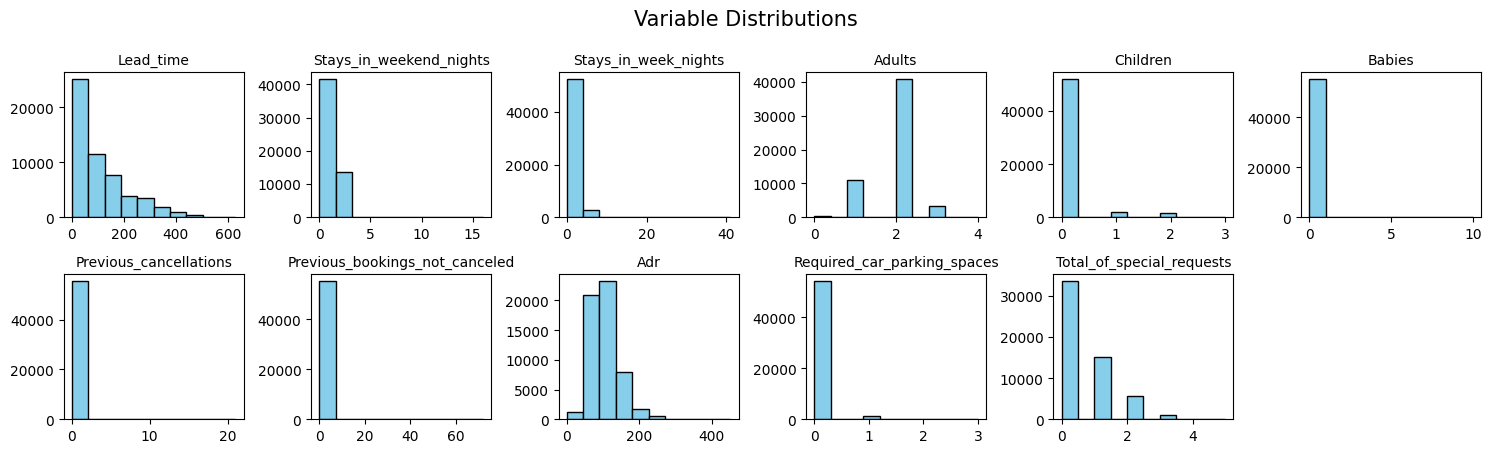

In [22]:
def plot_variable_distributions(X):
    features = X.columns
    plt.figure(figsize=(15, 10))

    for i, feature in enumerate(features, 1):
        plt.subplot(5, 6, i)  # Adjust the grid size as per the number of features
        X[feature].hist(grid=False, color='skyblue', edgecolor='black')
        plt.title(feature.capitalize(), fontsize=10)
        plt.xlabel("")
        plt.ylabel("")

    plt.tight_layout(pad=1)
    plt.suptitle("Variable Distributions", fontsize=15, y=1.03)
    plt.show()

NumList = ['lead_time', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests']

plot_variable_distributions(X_features[NumList])

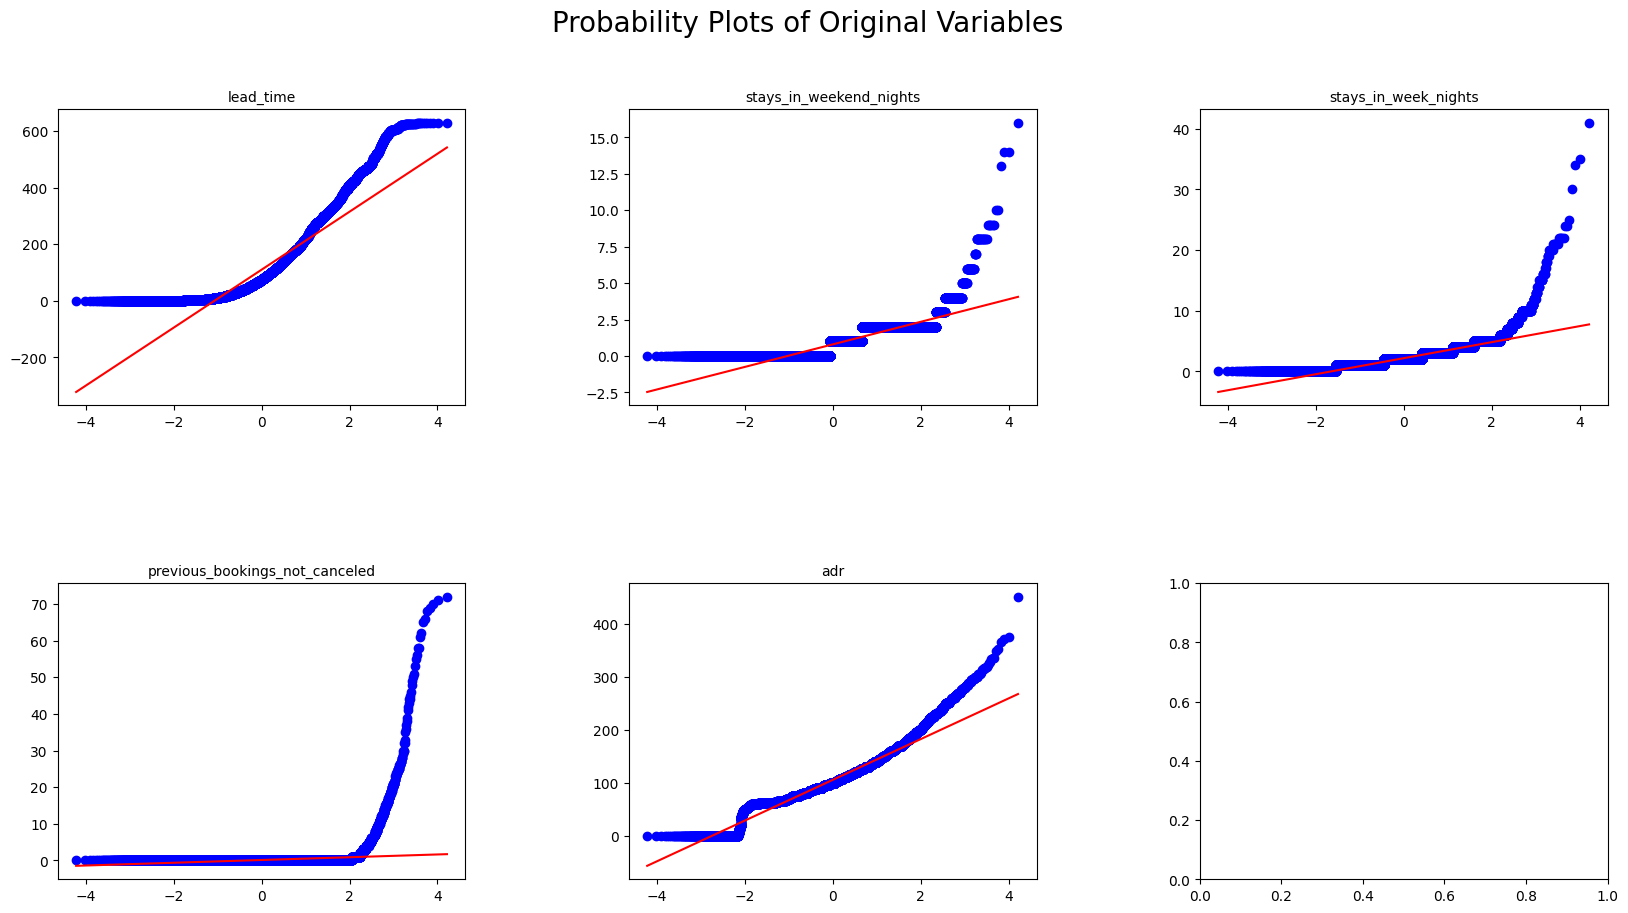

In [25]:
test_transform = ['lead_time','stays_in_weekend_nights','stays_in_week_nights','previous_bookings_not_canceled','adr']

# Create a probability plot for each variable in test_transform
def plot_probability_plots(df, test_transform, plot_title):
    # Create a subplot grid
    fig, axes = plt.subplots(2, 3, figsize=(20, 10))

    # Adjust spacing between plots for better readability
    plt.subplots_adjust(wspace=0.4, hspace=0.6)

    # Set the main title for all subplots
    fig.suptitle(plot_title, fontsize=20)

    # Loop through the variables and create probability plots
    for ax, variable in zip(axes.flat, test_transform):
        probplot(df[variable], plot=ax)
        ax.set_title(variable, fontsize=10)
        ax.set_xlabel('')  # Optionally remove x-axis label for cleaner look
        ax.set_ylabel('')  # Optionally remove y-axis label for cleaner look

    # Display the plots
    plt.show()

# Call the function to create probability plots for the original variables
plot_probability_plots(X_features, test_transform, 'Probability Plots of Original Variables')

Everything except 'adults' look not normal

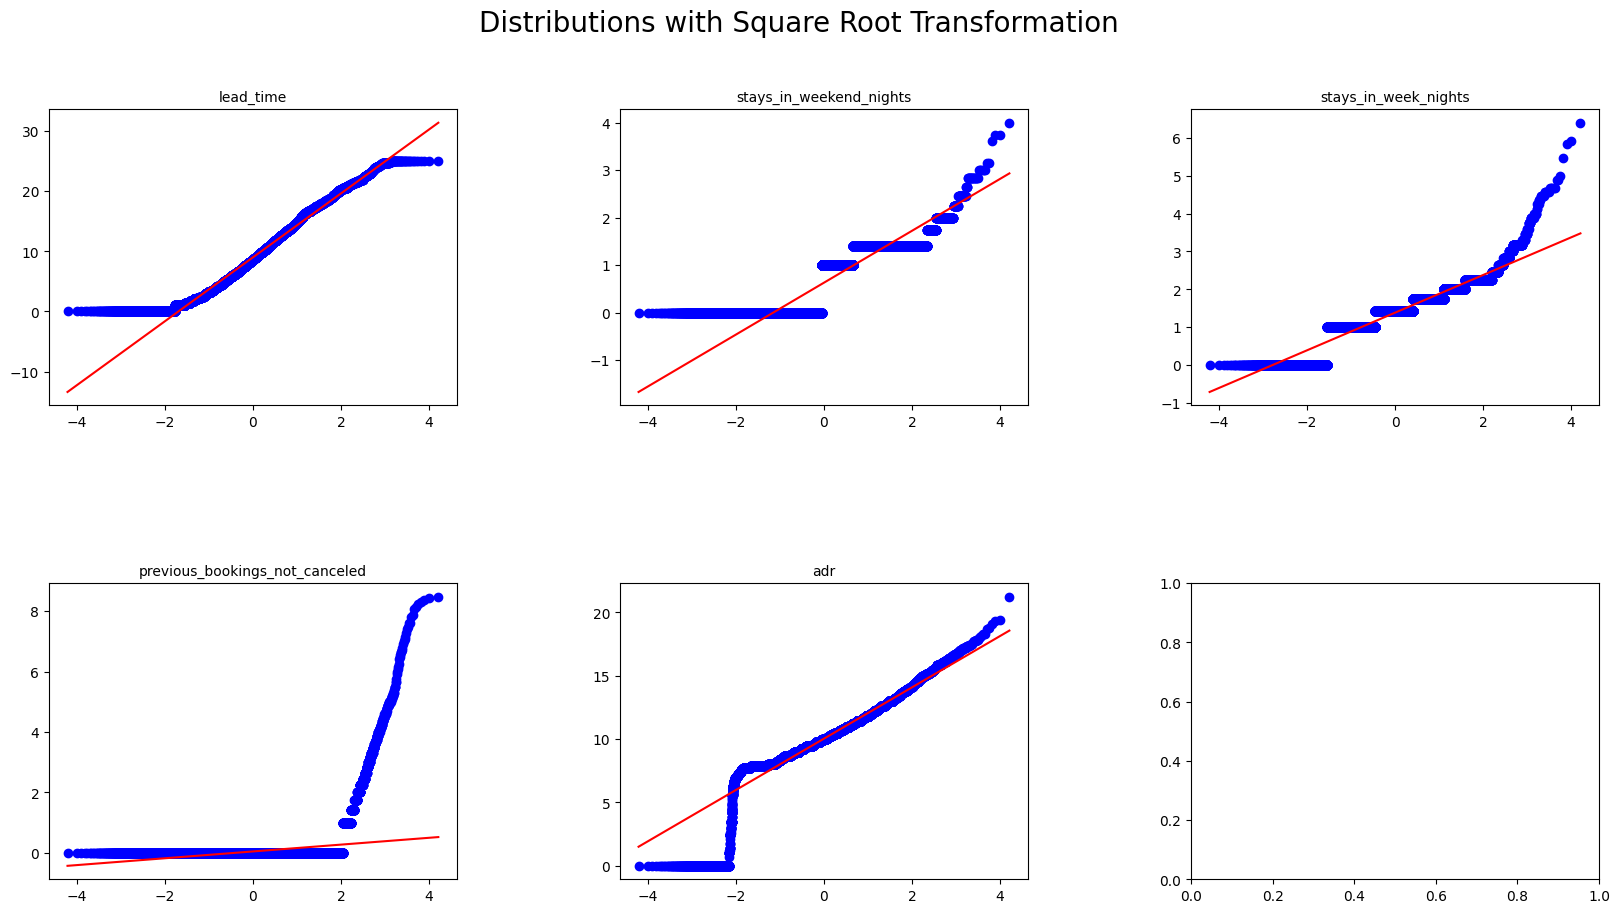

In [31]:
def plot_transformed_probability_plots(df, variables, transformation, transformation_name):

    # Creating a subplot grid
    fig, axes = plt.subplots(2,3, figsize=(20, 10))

    # Adjusting the spacing between the subplots for better readability
    plt.subplots_adjust(wspace=0.4, hspace=0.6)

    # Adding a main title for the entire figure
    fig.suptitle(f'Distributions with {transformation_name} Transformation', fontsize=20)

    # Looping through each variable and subplot axes
    for ax, var in zip(axes.flat, variables):
        # Creating a probability plot for the transformed variable
        stats.probplot(transformation(df[var]), plot=ax)

        # Setting the title for each subplot
        ax.set_title(var, fontsize=10)

        # Optionally, making the x and y-axis labels invisible for cleaner visuals
        ax.set_xlabel('')
        ax.set_ylabel('')

    # Displaying the plots
    plt.show()
# Calling the Function with Square Root Transformation
plot_transformed_probability_plots(X_features, test_transform, np.sqrt, 'Square Root')

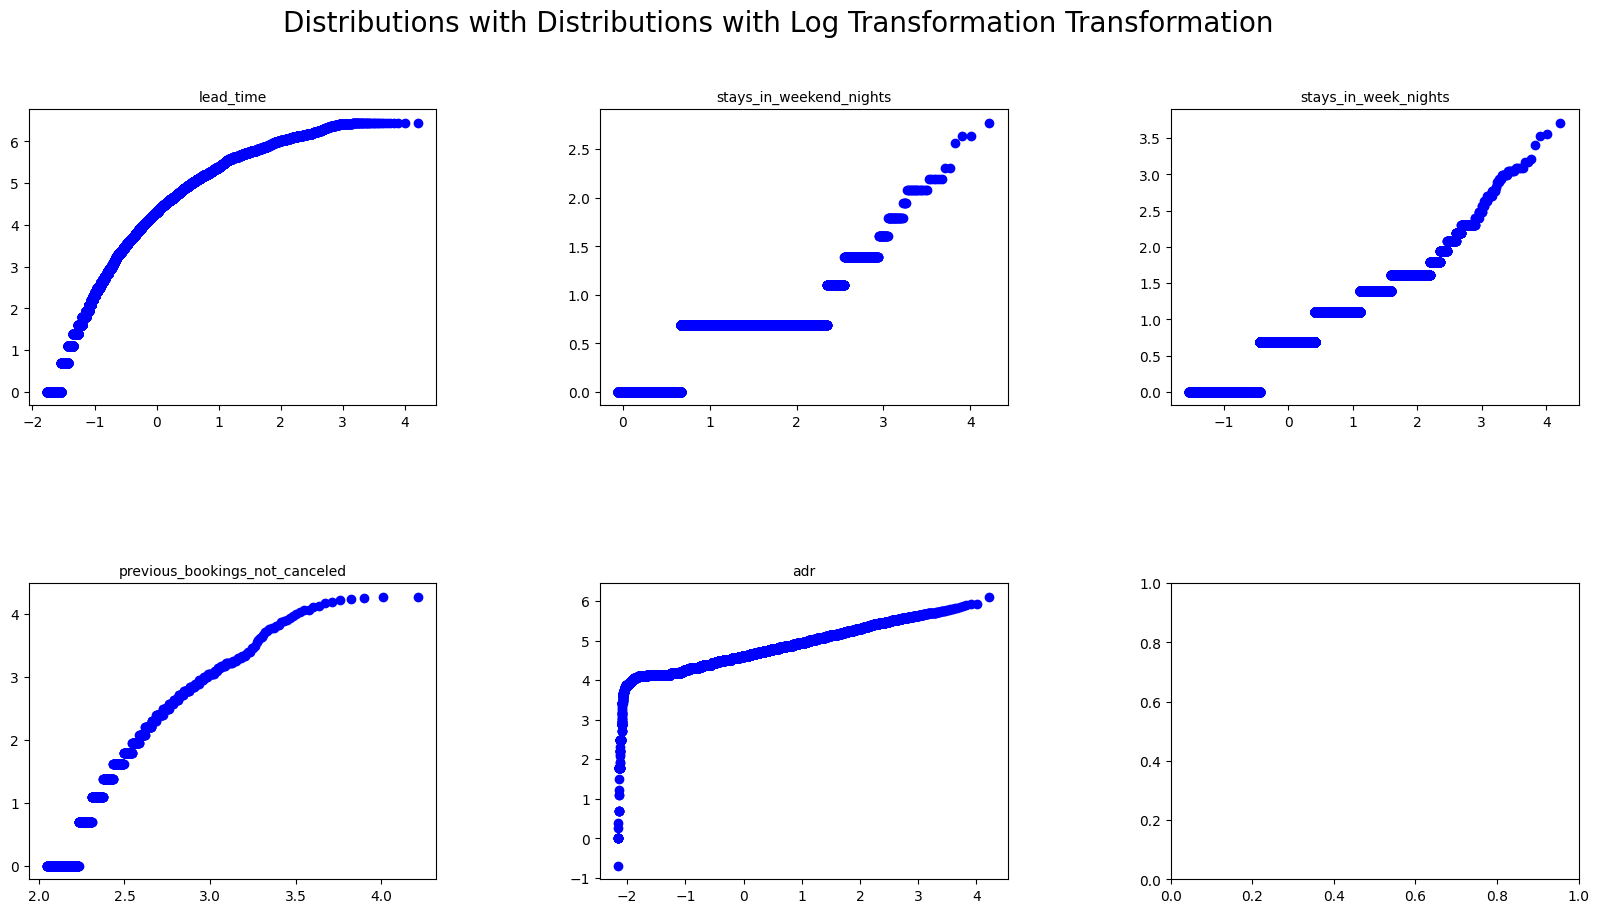

In [33]:
plot_transformed_probability_plots(X_features, test_transform, np.log, "Distributions with Log Transformation")

In [41]:
# Create lists containing column names for each type of transformation
sqrt = ['lead_time','adr']
log = ['stays_in_weekend_nights','stays_in_week_nights','previous_bookings_not_canceled']

# For train data
for i in sqrt:
    colname = str(i) +'_sqrt'
    X_features[colname] = np.sqrt(df[i])
for i in log:
    colname = str(i) +'_log'
    X_features[colname] = np.log1p(df[i])

# For test data
for i in sqrt:
    colname = str(i) +'_sqrt'
    X_test_final[colname] = np.sqrt(df[i])
for i in log:
    colname = str(i) +'_log'
    X_test_final[colname] = np.log1p(df[i])

def drop_columns(df, columns_to_drop):
    df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
    print("Updated DataFrame Shape:", df.shape)
    print("Updated Columns:\n", df.columns.tolist())

# Combine all columns to be dropped into a single list and drop them
columns_to_drop = sqrt + log
drop_columns(X_features, columns_to_drop)
drop_columns(X_test_final, columns_to_drop)


Updated DataFrame Shape: (55527, 32)
Updated Columns:
 ['adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'required_car_parking_spaces', 'total_of_special_requests', 'meal_FB', 'meal_HB', 'meal_SC', 'market_segment_Complementary', 'market_segment_Corporate', 'market_segment_Direct', 'market_segment_Groups', 'market_segment_Offline TA/TO', 'market_segment_Online TA', 'distribution_channel_Direct', 'distribution_channel_GDS', 'distribution_channel_TA/TO', 'deposit_type_Non Refund', 'deposit_type_Refundable', 'customer_type_Group', 'customer_type_Transient', 'customer_type_Transient-Party', 'got_reserved_room_type', 'is_holiday', 'is_weekend', 'lead_time_sqrt', 'adr_sqrt', 'stays_in_weekend_nights_log', 'stays_in_week_nights_log', 'previous_bookings_not_canceled_log']
Updated DataFrame Shape: (23798, 32)
Updated Columns:
 ['adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'required_car_parking_spaces', 'total_of_special_requests', 

In [42]:
################################### kNN #########################################

pipe = Pipeline([
        ('sc', MinMaxScaler(feature_range=(0, 1))),
        ('knn', KNeighborsClassifier())
      ])
pipe.fit(X_features,y_train)

knn_initial_score = cross_val_score(pipe,
                          X_features,
                          y_train,
                          cv=10,
                          scoring='f1')
print("\n### kNN ###")
print("kNN f1: %0.2f (+/- %0.2f)" % (knn_initial_score.mean(), knn_initial_score.std()))


################################### Decision Tree ################################

dt_initial_score=cross_val_score(DecisionTreeClassifier(max_depth=10),
                          X_features,
                          y_train,
                          cv=10,
                          scoring='f1')

print("\n### Decision Tree ###")
print("tree f1: %0.2f (+/- %0.2f)" % (dt_initial_score.mean(), dt_initial_score.std()))


################################## Logistic Regression ###########################

logistic_initial_scores = cross_val_score(LogisticRegression(), X_features, y_train, cv=10, scoring='f1')

print("\n### Logistic Regression ###")
print("tree f1: %0.2f (+/- %0.2f)" % (logistic_initial_scores.mean(), logistic_initial_scores.std()))


### kNN ###
kNN f1: 0.77 (+/- 0.01)

### Decision Tree ###
tree f1: 0.77 (+/- 0.01)

### Logistic Regression ###
tree f1: 0.74 (+/- 0.01)


## Nested Cross-validation
Transformed features also contribute slight improvments to the performances

In [44]:
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

################################### kNN #########################################

pipe = Pipeline([
        ('sc', StandardScaler()),
        ('knn', KNeighborsClassifier(p=2, metric='minkowski')) 
      ])

#Parameters to optimize
params = {
        'knn__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
        'knn__weights': ['uniform', 'distance'], 
    }

gs_knn = GridSearchCV(estimator=pipe,
                  param_grid=params,
                  scoring='f1',
                  cv=inner_cv,
                  n_jobs=4)

gs_knn = gs_knn.fit(X_features,y_train)
print("\nParameter Tuning #1")

print("Non-nested CV f1: ", gs_knn.best_score_)
print("Optimal Parameter: ", gs_knn.best_params_)
print("Optimal Estimator: ", gs_knn.best_estimator_)
nested_score_gs_knn = cross_val_score(gs_knn, X=X_features, y= y_train, cv=outer_cv)
print("Nested CV f1: ",nested_score_gs_knn.mean(), " +/- ", nested_score_gs_knn.std())

################################### Decision Tree ################################

gs_tree = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, None],
                               'min_samples_leaf':[1, 2, 3, 4, 5, 6],
                               'criterion':['gini','entropy'],
                               'min_samples_split':[2,3,4,5],
                               }],
                  scoring='f1',
                  cv=inner_cv)

gs_tree = gs_tree.fit(X_features,y_train)
print("\nParameter Tuning #2")
print("Non-nested CV f1: ", gs_tree.best_score_)
print("Optimal Parameter: ", gs_tree.best_params_)
print("Optimal Estimator: ", gs_tree.best_estimator_)
nested_score_gs_tree = cross_val_score(gs_tree, X=X_features, y= y_train, cv=outer_cv)
print("Nested CV f1: ",nested_score_gs_tree.mean(), " +/- ", nested_score_gs_tree.std())

################################## Logistic Regression ###########################

param_grid = [{'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000],
               'penalty': ['l1', 'l2']}]

# Create the GridSearchCV object
gs_log = GridSearchCV(estimator=LogisticRegression(random_state=42, solver='liblinear'),
                     param_grid=param_grid,
                     scoring='f1',
                     cv=inner_cv)

gs_log = gs_log.fit(X_features,y_train)
print("\n Parameter Tuning #3")
print("Non-nested CV F1: ", gs_log.best_score_)
print("Optimal Parameter: ", gs_log.best_params_)
print("Optimal Estimator: ", gs_log.best_estimator_)
nested_score_gs_log = cross_val_score(gs_log, X=X_features, y=y_train, cv=outer_cv)
print("Nested CV F1:",nested_score_gs_log.mean(), " +/- ", nested_score_gs_log.std())


Parameter Tuning #1
Non-nested CV f1:  0.806749764091974
Optimal Parameter:  {'knn__n_neighbors': 21, 'knn__weights': 'distance'}
Optimal Estimator:  Pipeline(steps=[('sc', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(n_neighbors=21, weights='distance'))])
Nested CV f1:  0.806749764091974  +/-  0.00314238288024165

Parameter Tuning #2
Non-nested CV f1:  0.7777900205707503
Optimal Parameter:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3}
Optimal Estimator:  DecisionTreeClassifier(criterion='entropy', min_samples_split=3,
                       random_state=42)
Nested CV f1:  0.7771277185062514  +/-  0.005685821980367845

 Parameter Tuning #3
Non-nested CV F1:  0.744813869227692
Optimal Parameter:  {'C': 1000, 'penalty': 'l2'}
Optimal Estimator:  LogisticRegression(C=1000, random_state=42, solver='liblinear')
Nested CV F1: 0.7445244413146999  +/-  0.005425402054907082


## Model Evaluation

#### Classification Report & Confusion Matrix

Classification Report for KNN Training Set:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     32359
           1       0.99      0.98      0.99     23168

    accuracy                           0.99     55527
   macro avg       0.99      0.99      0.99     55527
weighted avg       0.99      0.99      0.99     55527

Classification Report for KNN Test Set:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88     13869
           1       0.86      0.78      0.82      9929

    accuracy                           0.85     23798
   macro avg       0.85      0.84      0.85     23798
weighted avg       0.85      0.85      0.85     23798

Classification Report for Decision Trees Training Set:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     32359
           1       0.99      0.95      0.97     23168

    accuracy                           0.98

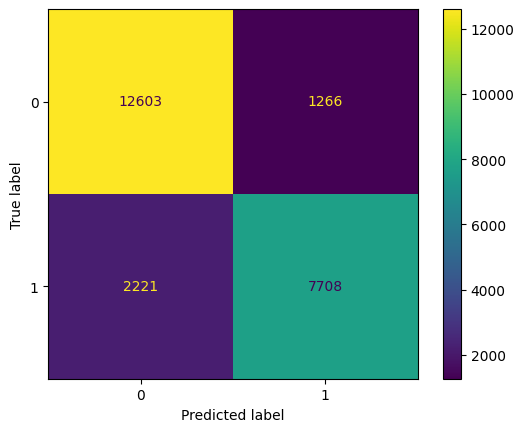

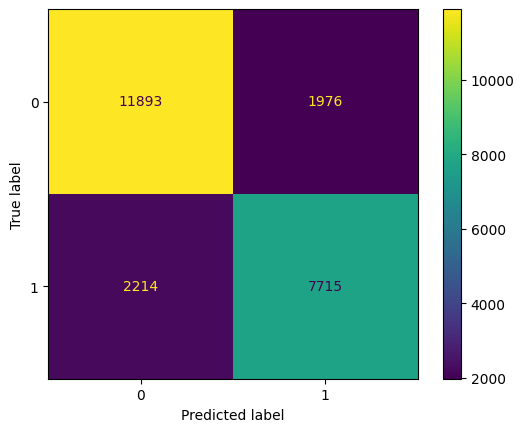

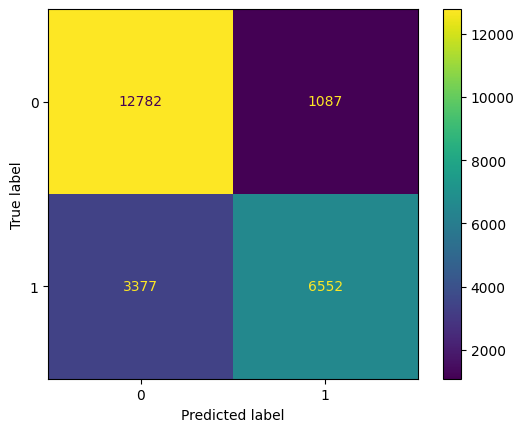

In [50]:
import sklearn.metrics
################################### kNN #########################################

pipeknn = Pipeline([
        ('sc', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=21,
                           p=2,                 
                           metric='minkowski', 
                           n_jobs=-1,
                           weights='distance')) 
      ])

knn = pipeknn.fit(X_features, y_train)
predprobKnn = knn.predict_proba(X_test_final)
predTrainKnn = knn.predict( X_features )
predTestKnn = knn.predict( X_test_final)
print("Classification Report for KNN Training Set:")
print( sklearn.metrics.classification_report( y_train, predTrainKnn ) )
print("Classification Report for KNN Test Set:")
print( sklearn.metrics.classification_report( y_test, predTestKnn ) )

cmKnn = sklearn.metrics.confusion_matrix( y_test, predTestKnn )
plotCmKnn = sklearn.metrics.ConfusionMatrixDisplay( cmKnn, display_labels=knn.classes_ ).plot()

################################### Decision Tree ################################

trees = DecisionTreeClassifier(random_state=42,
                               min_samples_leaf = 1, min_samples_split = 3,
                               criterion = 'entropy')

tree = trees.fit(X_features, y_train)
predprobTrees = tree.predict_proba(X_test_final)
predTrainTree = tree.predict( X_features )
predTestTree = tree.predict( X_test_final)
print("Classification Report for Decision Trees Training Set:")
print( sklearn.metrics.classification_report( y_train, predTrainTree ) )
print("Classification Report for Decision Trees Test Set:")
print( sklearn.metrics.classification_report( y_test, predTestTree ) )

cmTree = sklearn.metrics.confusion_matrix( y_test, predTestTree )
plotCmTree = sklearn.metrics.ConfusionMatrixDisplay( cmTree, display_labels=tree.classes_ ).plot()

################################## Logistic Regression ###########################

pipeLogistic = Pipeline([
        ('sc', StandardScaler()),
        ('logit', LogisticRegression(penalty='l2', C = 1000 , solver='liblinear'))
      ])
logit = pipeLogistic.fit(X_features, y_train)

predprobLogistic = logit.predict_proba(X_test_final)
predTrainLogistic = logit.predict( X_features )
predTestLogistic = logit.predict( X_test_final)
print("Classification Report for Logistic Training Set:")
print( sklearn.metrics.classification_report( y_train, predTrainLogistic ) )
print("Classification Report for Logistic Test Set:")
print( sklearn.metrics.classification_report( y_test, predTestLogistic ) )

cmLogistic = sklearn.metrics.confusion_matrix( y_test, predTestLogistic )
plotCmLogistic = sklearn.metrics.ConfusionMatrixDisplay( cmLogistic, display_labels=logit.classes_ ).plot()

#### ROC

10-fold cross validation:

ROC AUC: 0.87 (+/- 0.01) [Logistic regression]
ROC AUC: 0.80 (+/- 0.01) [Decision tree]
ROC AUC: 0.90 (+/- 0.01) [kNN]


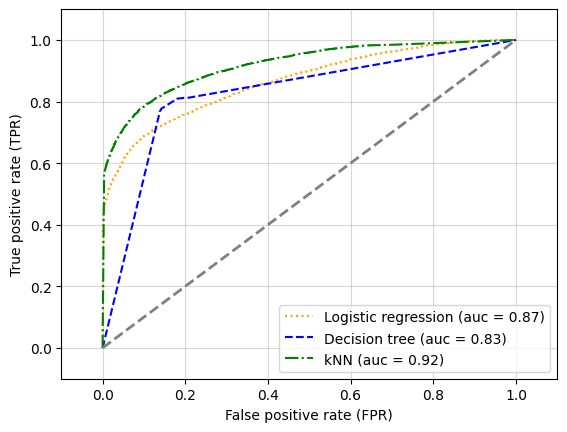

In [55]:
clf_labels = ['Logistic regression', 'Decision tree', 'kNN']
all_clf = [logit, tree, knn]

print('10-fold cross validation:\n')
for clf, label in zip([logit, trees, pipeknn], clf_labels): #For all classifiers
    scores = cross_val_score(estimator=clf,  # estimate AUC based on cross validation
                             X=X_test_final,
                             y=y_test,
                             cv=10,
                             scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" # print peformance statistics based on cross-validation
          % (scores.mean(), scores.std(), label))

##################################### Visualization ######################################

colors = [ 'orange', 'blue', 'green']      # colors for visualization
linestyles = [':', '--', '-.', '-']        # line styles for visualization
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):

    # Assuming the label of the positive class is 1 and data is normalized
    y_pred = clf.fit(X_features, y_train).predict_proba(X_test_final)[:, 1] # make predictions based on the classifiers

    fpr, tpr, thresholds = roc_curve(y_true=y_test,       # build ROC curve
                                     y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)                           # compute Area Under the Curve (AUC)
    plt.plot(fpr, tpr,                                
             color=clr,
             linestyle=ls,
             label='%s (auc = %0.2f)' % (label, roc_auc))

plt.legend(loc='lower right')   
plt.plot([0, 1], [0, 1],        
         linestyle='--',     
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')

plt.show()